# **001 Importing Dependencies**

In [ ]:
!pip install download


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import absolute_import,division,print_function,unicode_literals

In [ ]:
import seaborn as sns

import matplotlib as mlp
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import os 
from datetime import datetime

from download import download

mlp.rcParams['figure.figsize'] = (8,6)
mlp.rcParams['axes.grid'] = False

# **002_Download and Load the datasets**

### beijing city county data import Dingling






In [ ]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', 'tmp/aq', kind='zip')

Creating data folder...

file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:01<00:00, 5.16MB/s]
Extracting zip file...
Successfully downloaded / unzipped to tmp/aq


In [ ]:
df = pd.read_csv('/content/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding = 'ISO-8859-1')

In [ ]:
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [ ]:
df.shape

(35064, 18)

In [ ]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

## **Target variable in this project is PM2.5**

### What is Particulate Matter 2.5 (PM2.5)?

The term fine particles, or particulate matter 2.5 (PM2.5), refers to tiny particles or droplets in the air that are two and one half microns or less in width. Like inches, meters and miles, a micron is a unit of measurement for distance. There are about 25,000 microns in an inch. The widths of the larger particles in the PM2.5 size range would be about thirty times smaller than that of a human hair. The smaller particles are so small that several thousand of them could fit on the period at the end of this sentence

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

Refer link for strptime: https://www.geeksforgeeks.org/python-datetime-strptime-function/

In [ ]:
aq_df = pd.read_csv('/content/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year','month','day','hour']], date_parser = convert_to_date, keep_date_col=True)

In [ ]:
aq_df

year_month_day_hour     No  year month day hour  PM2.5  PM10  SO2  NO2  \
0     2013-03-01 00:00:00      1  2013     3   1    0    4.0   4.0  3.0  NaN   
1     2013-03-01 01:00:00      2  2013     3   1    1    7.0   7.0  3.0  NaN   
2     2013-03-01 02:00:00      3  2013     3   1    2    5.0   5.0  3.0  2.0   
3     2013-03-01 03:00:00      4  2013     3   1    3    6.0   6.0  3.0  NaN   
4     2013-03-01 04:00:00      5  2013     3   1    4    5.0   5.0  3.0  NaN   
...                   ...    ...   ...   ...  ..  ...    ...   ...  ...  ...   
35059 2017-02-28 19:00:00  35060  2017     2  28   19   11.0  11.0  2.0  2.0   
35060 2017-02-28 20:00:00  35061  2017     2  28   20   13.0  13.0  2.0  2.0   
35061 2017-02-28 21:00:00  35062  2017     2  28   21    9.0  14.0  2.0  2.0   
35062 2017-02-28 22:00:00  35063  2017     2  28   22   10.0  12.0  2.0  2.0   
35063 2017-02-28 23:00:00  35064  2017     2  28   23   13.0  16.0  4.0  9.0   

          CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      200.0   82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1      200.0   80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2      200.0   79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3      200.0   79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4      200.0   81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...      ...    ...   ...     ...   ...   ...  ...   ...       ...  
35059  200.0   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
35060  200.0  101.0  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
35061  200.0  102.0   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
35062  200.0   97.0   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
35063  500.0   74.0   7.0  1009.4 -12.2   0.0    N   1.9  Dingling  

[35064 rows x 19 columns]

In [ ]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [ ]:
aq_df['month'] = pd.to_numeric(aq_df['month'])

In [ ]:
print('Rows :', aq_df.shape[0])
print('Columns :', aq_df.shape[1])
print("\n Features: \n", aq_df.columns.tolist())
print("\n Missing Values: \n", aq_df.isnull().any())
print("\nUnique Values \n", aq_df.nunique())

Rows : 35064
Columns : 19

 Features: 
 ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

 Missing Values: 
 year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique Values 
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                   

In [ ]:
aq_df.describe()

No         month         PM2.5          PM10           SO2  \
count  35064.000000  35064.000000  34285.000000  34408.000000  34334.000000   
mean   17532.500000      6.522930     65.989497     83.739723     11.749650   
std    10122.249256      3.448752     72.267723     79.541685     15.519259   
min        1.000000      1.000000      3.000000      2.000000      0.285600   
25%     8766.750000      4.000000     14.000000     26.000000      2.000000   
50%    17532.500000      7.000000     41.000000     60.000000      5.000000   
75%    26298.250000     10.000000     93.000000    117.000000     15.000000   
max    35064.000000     12.000000    881.000000    905.000000    156.000000   

                NO2            CO            O3          TEMP          PRES  \
count  33830.000000  33052.000000  33850.000000  35011.000000  35014.000000   
mean      27.585467    904.896073     68.548371     13.686111   1007.760278   
std       26.383882    903.306220     53.764424     11.365313     10.225664   
min        1.026500    100.000000      0.214200    -16.600000    982.400000   
25%        9.000000    300.000000     31.000000      3.400000    999.300000   
50%       19.000000    600.000000     61.000000     14.700000   1007.400000   
75%       38.000000   1200.000000     90.000000     23.300000   1016.000000   
max      205.000000  10000.000000    500.000000     41.400000   1036.500000   

               DEWP          RAIN          WSPM  
count  35011.000000  35013.000000  35021.000000  
mean       1.505495      0.060366      1.853836  
std       13.822099      0.752899      1.309808  
min      -35.100000      0.000000      0.000000  
25%      -10.200000      0.000000      1.000000  
50%        1.800000      0.000000      1.500000  
75%       14.200000      0.000000      2.300000  
max       27.200000     52.100000     10.000000

### **2.1 Make copy of data**

In [ ]:
aq_df_non_indexed = aq_df.copy()

In [ ]:
aq_df = aq_df.set_index('year_month_day_hour')

In [ ]:
aq_df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [ ]:
aq_df.head()

No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                           
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

### **2.2 Querying the data between dates**

In [ ]:
aq_df.loc['2013-03-01':'2013-03-05']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                        
2013-03-01 00:00:00    1  2013      3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00    2  2013      3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00    3  2013      3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00    4  2013      3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00    5  2013      3   1    4    5.0    5.0   3.0   NaN   
...                  ...   ...    ...  ..  ...    ...    ...   ...   ...   
2013-03-05 19:00:00  116  2013      3   5   19  179.0  200.0  50.0  96.0   
2013-03-05 20:00:00  117  2013      3   5   20  172.0  180.0  43.0  94.0   
2013-03-05 21:00:00  118  2013      3   5   21  179.0  191.0  38.0  80.0   
2013-03-05 22:00:00  119  2013      3   5   22  173.0  168.0  39.0  73.0   
2013-03-05 23:00:00  120  2013      3   5   23  170.0  162.0  42.0  72.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2013-03-05 19:00:00  1600.0  82.0   7.7  1005.4  -7.6   0.0  NNE   0.2   
2013-03-05 20:00:00  1899.0  82.0   6.3  1005.9  -7.3   0.0  NNE   0.7   
2013-03-05 21:00:00  1700.0  82.0   5.6  1006.0  -7.3   0.0  NNE   0.2   
2013-03-05 22:00:00  1800.0  82.0   4.9  1005.8  -7.0   0.0    N   1.7   
2013-03-05 23:00:00  1700.0  82.0   3.7  1005.7  -6.9   0.0   NE   0.4   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2013-03-05 19:00:00  Dingling  
2013-03-05 20:00:00  Dingling  
2013-03-05 21:00:00  Dingling  
2013-03-05 22:00:00  Dingling  
2013-03-05 23:00:00  Dingling  

[120 rows x 18 columns]

In [ ]:
aq_df.loc['2013':'2015']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2013-03-01 00:00:00      1  2013      3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00      2  2013      3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00      3  2013      3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00      4  2013      3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00      5  2013      3   1    4    5.0    5.0   3.0   NaN   
...                    ...   ...    ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015     12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015     12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015     12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015     12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015     12  31   23   98.0   98.0  25.0  75.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0   2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0   2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0   2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0   2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0   2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[24864 rows x 18 columns]

In [ ]:
pm_data = aq_df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

In [ ]:
pm_data.tail()

year_month_day_hour
2017-02-28 19:00:00    11.0
2017-02-28 20:00:00    13.0
2017-02-28 21:00:00     9.0
2017-02-28 22:00:00    10.0
2017-02-28 23:00:00    13.0
Name: PM2.5, dtype: float64

### **2.3 Plotting the PM2.5 data**

<Axes: xlabel='year_month_day_hour'>

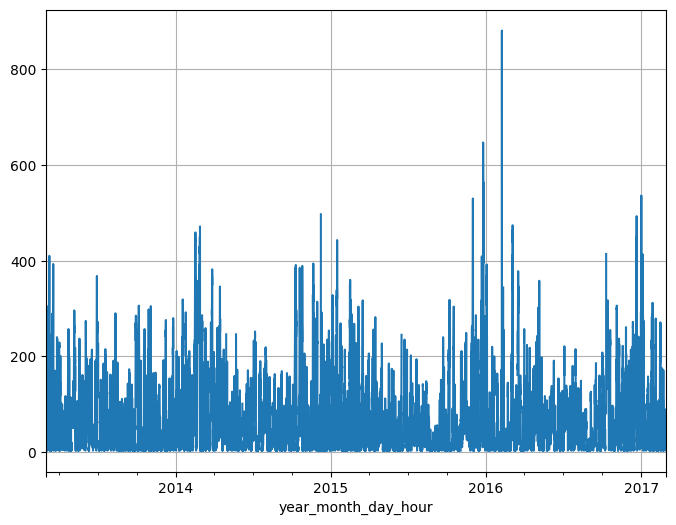

In [ ]:
pm_data.plot(grid=True)

### **2.4 Visualise the data only for year**

<Axes: xlabel='year_month_day_hour'>

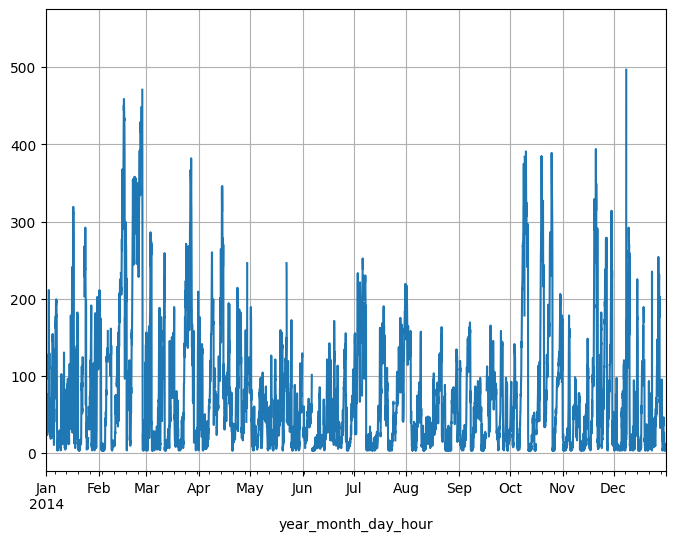

In [ ]:
aq_df_2014 = aq_df.loc['2014']
pm_data_2014 = aq_df_2014['PM2.5']
pm_data_2014.plot(grid = True)

<Axes: xlabel='year_month_day_hour'>

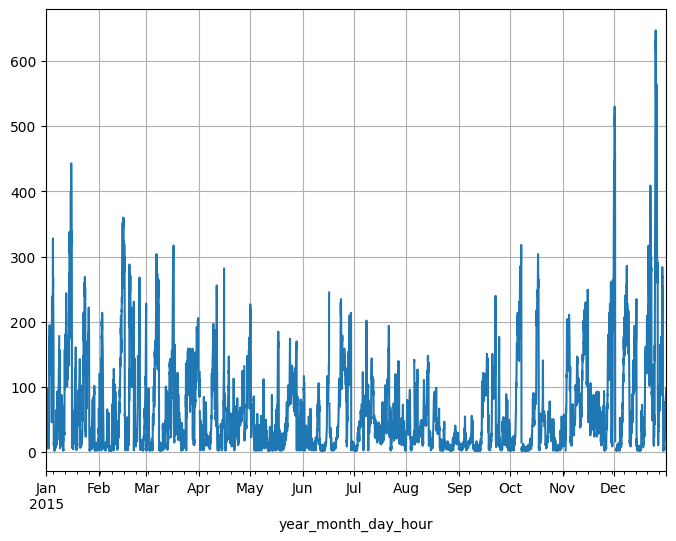

In [ ]:
aq_df_2015 = aq_df.loc['2015']
pm_data_2015 = aq_df_2015['PM2.5']
pm_data_2015.plot(grid = True)

<Axes: xlabel='year_month_day_hour'>

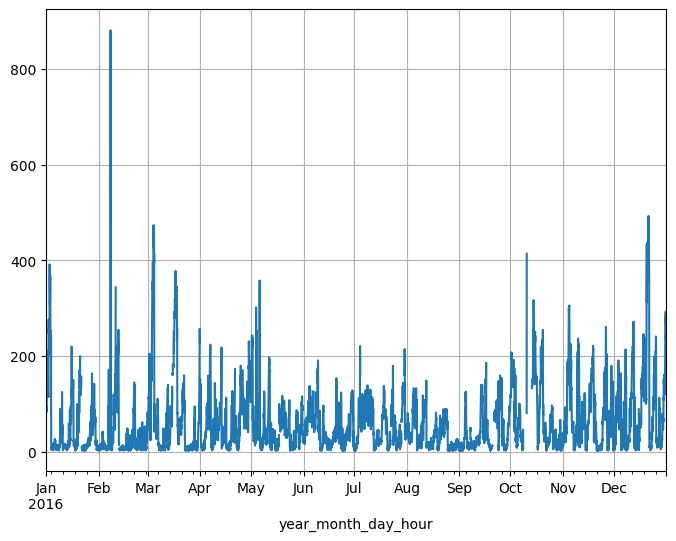

In [ ]:
aq_df_2016 = aq_df.loc['2016']
pm_data_2016 = aq_df_2016['PM2.5']
pm_data_2016.plot(grid = True)

From above graphs, it is clear that there is seasonality in data.
PM2.5 is increasing from October to March and then decreasing.

### **2.5 Visualization with Plotly**

In [ ]:
import plotly.express as px
fig = px.line(aq_df_non_indexed, x='year_month_day_hour', y='PM2.5', title = 'PM2.5 with slider')

fig.update_xaxes(rangeslider_visible = True)
fig.show()

In [ ]:
fig = px.line(aq_df_non_indexed, x='year_month_day_hour', y='PM2.5', title = 'PM2.5 with slider')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = ([
            dict(count=1, label = '1y', step='year', stepmode = 'backward'),
            dict(count=2, label = '2y', step='year', stepmode = 'backward'),
            dict(count=3, label = '3y', step='year', stepmode = 'backward'),
            dict(step='all')
        ])
    )
)

fig.show()

### **2.6 Overlay different year datasets**

<ipython-input-31-9e7bbded2feb>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-31-9e7bbded2feb>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-31-9e7bbded2feb>:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Text(0.5, 1.0, 'Air quality plot for the year 2014,2015 and 2016')

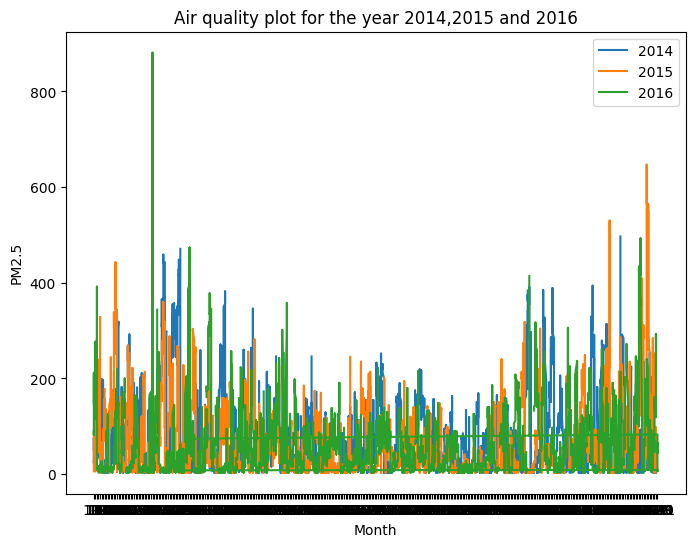

In [ ]:
df_2014 = aq_df['2014'].reset_index()
df_2015 = aq_df['2015'].reset_index()
df_2016 = aq_df['2016'].reset_index()
df_2014['month_day_hour'] = df_2014.apply(lambda x:str(x['month'])+"-"+x['day'], axis=1)
df_2015['month_day_hour'] = df_2015.apply(lambda x:str(x['month'])+"-"+x['day'], axis=1)
df_2016['month_day_hour'] = df_2016.apply(lambda x:str(x['month'])+"-"+x['day'], axis=1)
plt.plot(df_2014['month_day_hour'], df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'], df_2015['PM2.5'])
plt.plot(df_2016['month_day_hour'], df_2016['PM2.5'])
plt.legend(['2014','2015','2016'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air quality plot for the year 2014,2015 and 2016')

In [ ]:
aq_df['2014':'2016'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

In [ ]:
aq_df['2014':'2016'][['month','PM2.5','TEMP']].groupby('month').describe()

PM2.5                                                           TEMP  \
        count       mean         std  min   25%   50%     75%    max   count   
month                                                                          
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0  2229.0   
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0  2011.0   
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0  2231.0   
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0  2160.0   
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0  2232.0   
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0  2160.0   
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0  2232.0   
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0  2232.0   
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0  2153.0   
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0  2232.0   
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0  2160.0   
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0  2232.0   

                                                          
            mean       std   min   25%   50%   75%   max  
month                                                     
1      -1.594616  4.513169 -16.6  -4.6  -1.6   1.5  12.4  
2       0.861810  4.309023 -10.9  -2.0   1.0   3.8  14.0  
3       9.229352  6.531500  -6.4   4.3   9.1  14.1  26.0  
4      16.445741  5.553230   1.3  12.5  16.2  20.2  32.0  
5      21.493414  6.078441   7.0  17.3  21.4  25.9  41.4  
6      25.038287  4.534105  15.1  21.5  24.8  28.4  38.1  
7      27.239471  3.977007  16.8  24.2  27.0  30.3  39.2  
8      26.593414  4.104480  16.6  23.3  26.3  29.9  36.3  
9      20.857568  4.535383   7.8  17.6  20.5  23.9  34.5  
10     13.624937  4.860365  -1.4  10.4  13.6  16.6  28.1  
11      4.564444  5.227741 -10.3   1.3   4.6   7.8  20.8  
12     -0.146505  3.680166  -9.7  -2.8  -0.3   2.2  11.6

In [ ]:
aq_df['2014':'2016'][['month','PM2.5','PRES']].groupby('month').describe()

PM2.5                                                           PRES  \
        count       mean         std  min   25%   50%     75%    max   count   
month                                                                          
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0  2229.0   
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0  2011.0   
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0  2231.0   
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0  2160.0   
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0  2232.0   
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0  2160.0   
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0  2232.0   
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0  2232.0   
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0  2153.0   
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0  2232.0   
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0  2160.0   
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0  2232.0   

                                                                           
              mean       std     min       25%      50%       75%     max  
month                                                                      
1      1018.585419  6.629876  1001.0  1014.000  1019.00  1023.200  1036.5  
2      1017.175733  6.504462   999.0  1012.600  1018.20  1022.000  1031.2  
3      1011.288563  6.819290   992.9  1006.200  1010.80  1016.300  1029.1  
4      1005.254630  6.106875   985.4  1001.375  1005.00  1008.900  1025.2  
5       999.197939  5.957646   982.4   995.200   999.10  1003.500  1013.9  
6       996.209907  3.619752   985.6   993.900   996.20   998.700  1006.4  
7       996.035708  3.391000   986.4   993.600   996.00   998.400  1005.7  
8       999.092428  3.700222   985.4   996.700   999.00  1001.500  1010.0  
9      1005.582211  5.335990   985.6  1002.100  1005.40  1009.000  1022.4  
10     1011.450918  5.431682   999.0  1007.700  1011.05  1014.725  1031.1  
11     1016.806991  6.008397   996.6  1013.000  1017.00  1020.800  1033.1  
12     1019.682975  4.938893  1005.9  1016.700  1020.00  1023.000  1032.0

In [ ]:
aq_df['2014':'2017'][['month','PM2.5','TEMP','PRES']].groupby('month').agg({'PM2.5':['min','max'],'TEMP':['min','max'],'PRES':['min','max']})

PM2.5         TEMP          PRES        
        min    max   min   max     min     max
month                                         
1       3.0  536.0 -16.6  12.4  1001.0  1036.5
2       3.0  881.0 -10.9  15.6   997.2  1031.2
3       3.0  474.0  -6.4  26.0   992.9  1029.1
4       3.0  346.0   1.3  32.0   985.4  1025.2
5       3.0  358.0   7.0  41.4   982.4  1013.9
6       3.0  245.0  15.1  38.1   985.6  1006.4
7       3.0  252.0  16.8  39.2   986.4  1005.7
8       3.0  217.0  16.6  36.3   985.4  1010.0
9       3.0  240.0   7.8  34.5   985.6  1022.4
10      3.0  414.0  -1.4  28.1   999.0  1031.1
11      3.0  394.0 -10.3  20.8   996.6  1033.1
12      3.0  647.0  -9.7  11.6  1005.9  1032.0

<ipython-input-42-c031d9753e72>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

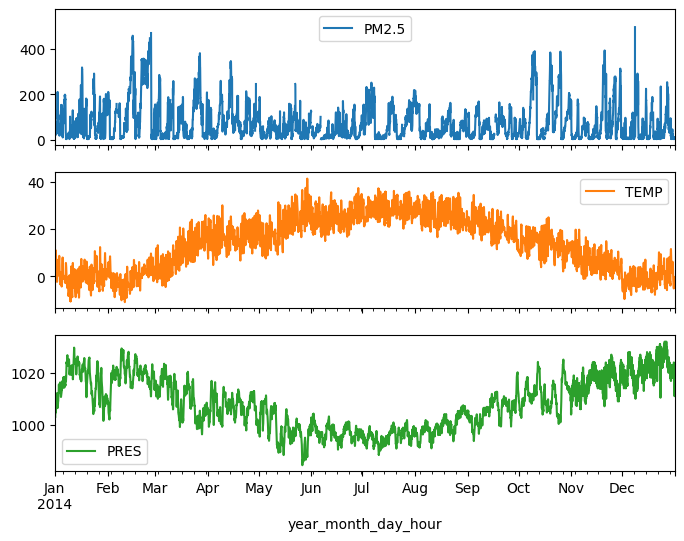

In [ ]:
aq_df_2014 = aq_df['2014']
pm_data_2014 = aq_df_2014[['PM2.5','TEMP','PRES']]
pm_data_2014.plot(subplots = True)

<ipython-input-41-2cc43453076d>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

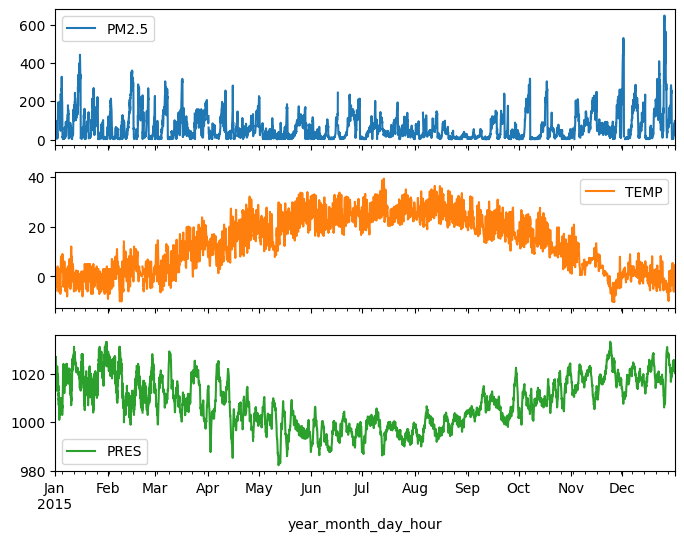

In [ ]:
aq_df_2015 = aq_df['2015']
pm_data_2015 = aq_df_2015[['PM2.5','TEMP','PRES']]
pm_data_2015.plot(subplots = True)

<ipython-input-43-c03455ebc9d1>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

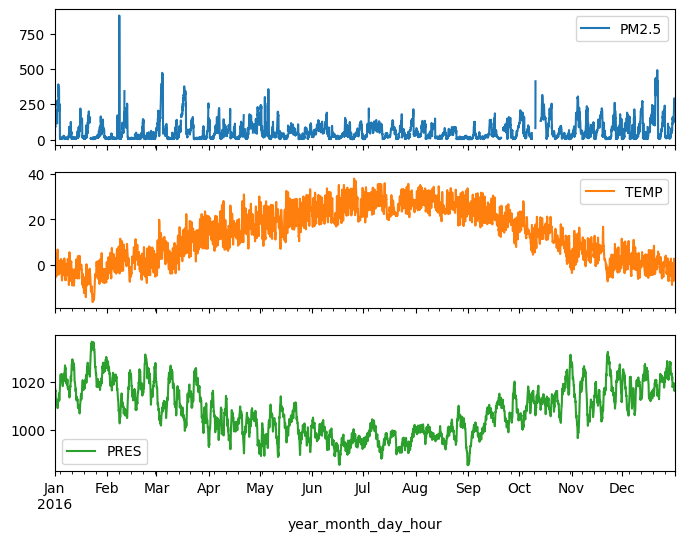

In [ ]:
aq_df_2016 = aq_df['2016']
pm_data_2016 = aq_df_2016[['PM2.5','TEMP','PRES']]
pm_data_2016.plot(subplots = True)

Refer : https://weather.com/en-IN/india/science/news/2018-10-30-why-do-pollution-levels-skyrocket-during-winter

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'TEMP'}>,
        <Axes: title={'center': 'PRES'}>]], dtype=object)

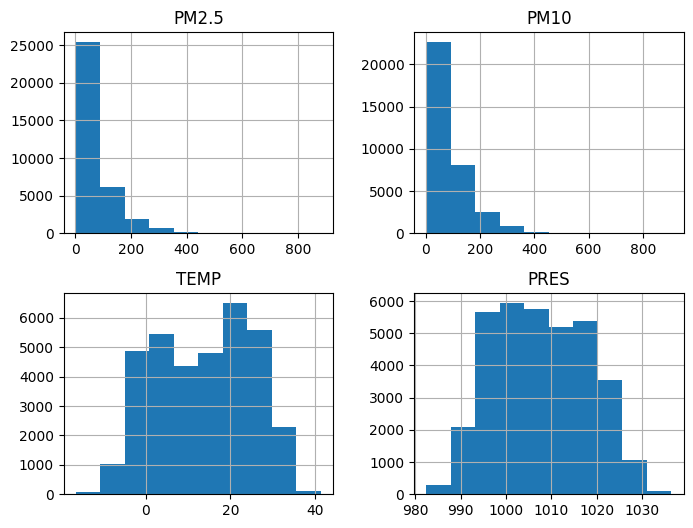

In [ ]:
aq_df[['PM2.5','PM10','TEMP','PRES']].hist()

<Axes: ylabel='Density'>

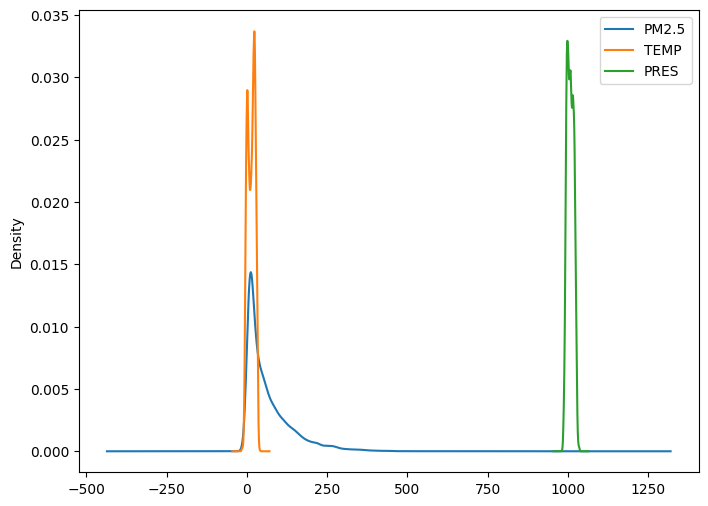

In [ ]:
aq_df[['PM2.5','TEMP','PRES']].plot(kind='density')

<Axes: ylabel='Density'>

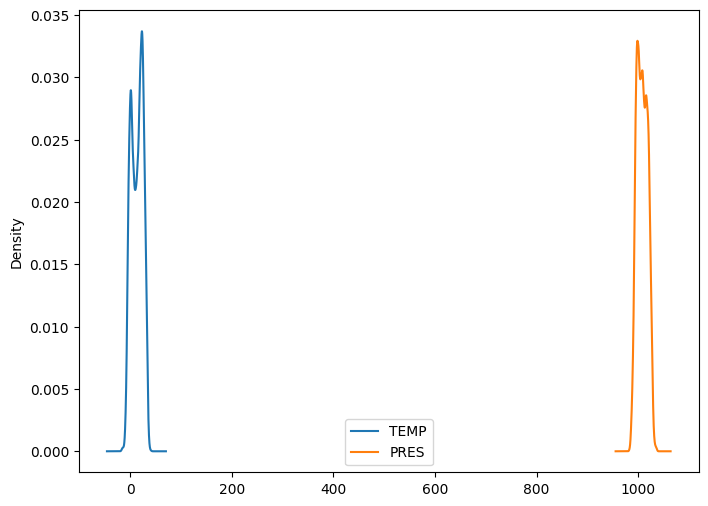

In [ ]:
aq_df[['TEMP','PRES']].plot(kind='density')

# **3.0 Lag Plot**

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

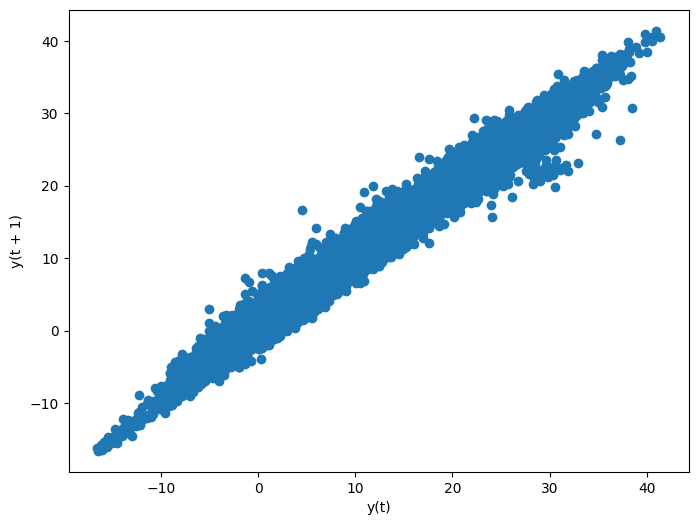

In [ ]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

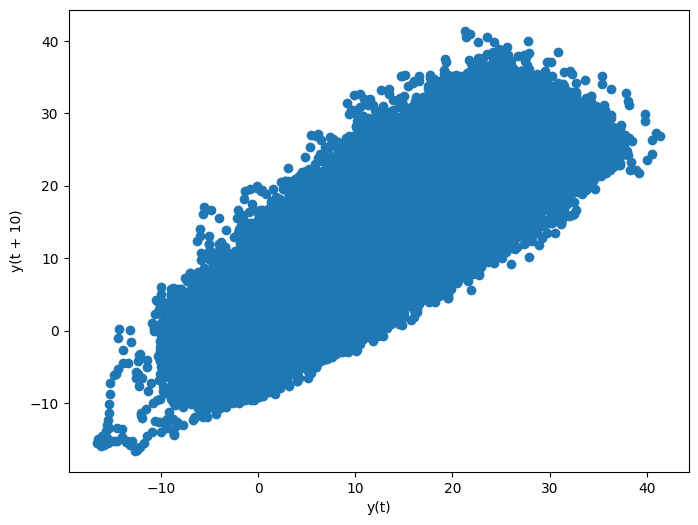

In [ ]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=10)

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

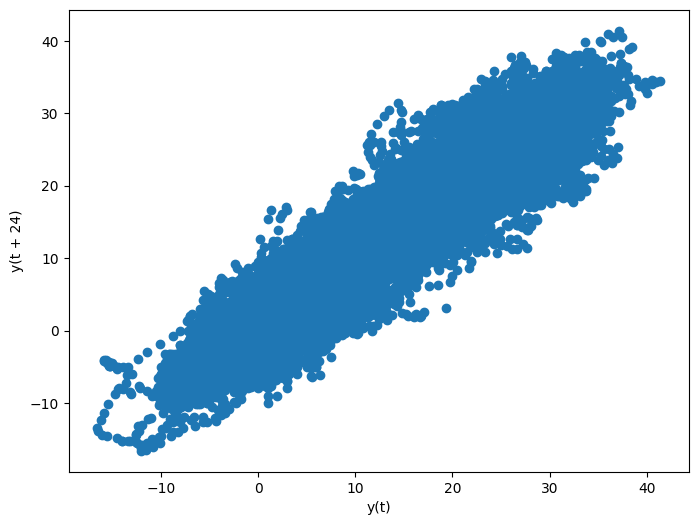

In [ ]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=24)

<Axes: xlabel='y(t)', ylabel='y(t + 8640)'>

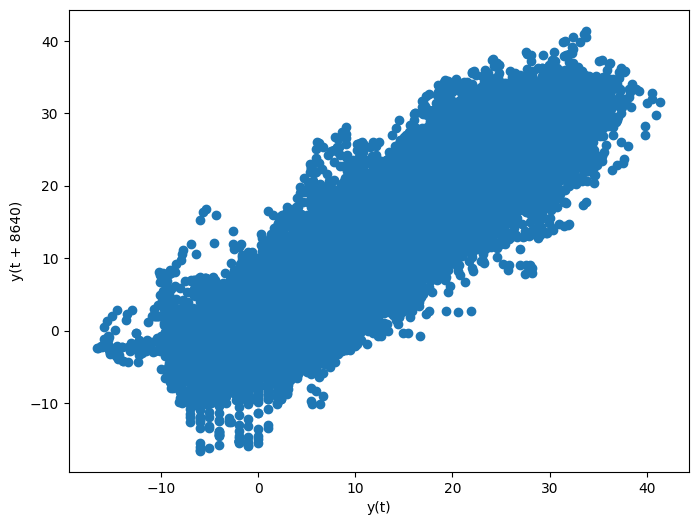

In [ ]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=8640)   #one year--->>> Positive correlation

<Axes: xlabel='y(t)', ylabel='y(t + 4320)'>

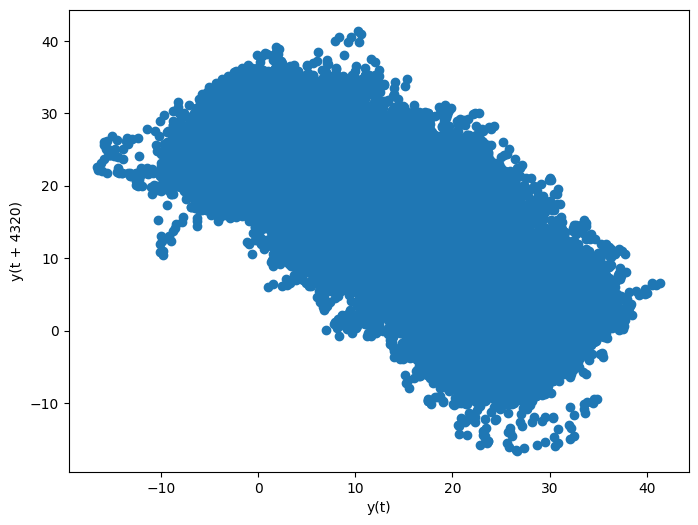

In [ ]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=4320)  #six months --->>> Negative correlation

<Axes: xlabel='y(t)', ylabel='y(t + 2150)'>

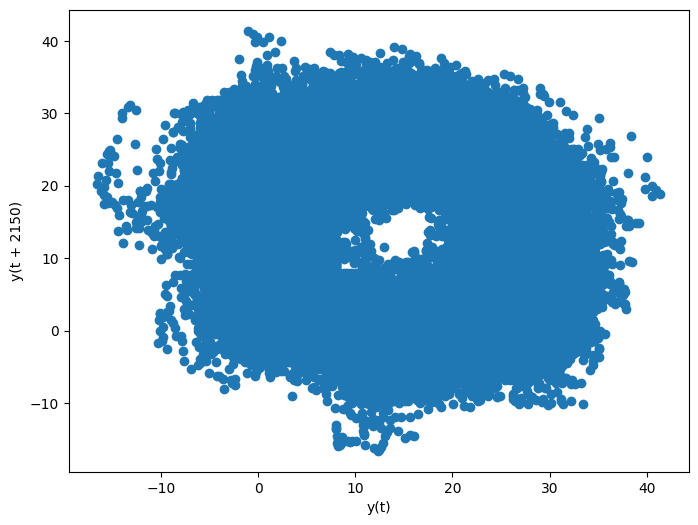

In [ ]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=2150)   #3months   --->>> No correlation

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

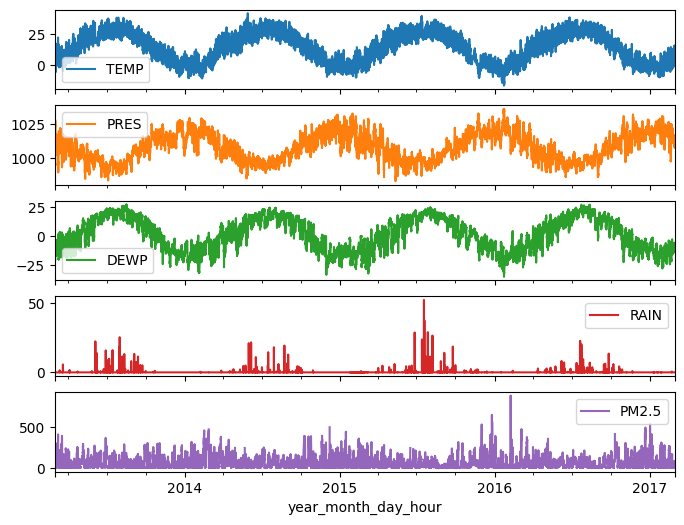

In [ ]:
multi_data = aq_df[['TEMP','PRES','DEWP','RAIN','PM2.5']]
multi_data.plot(subplots= True)

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

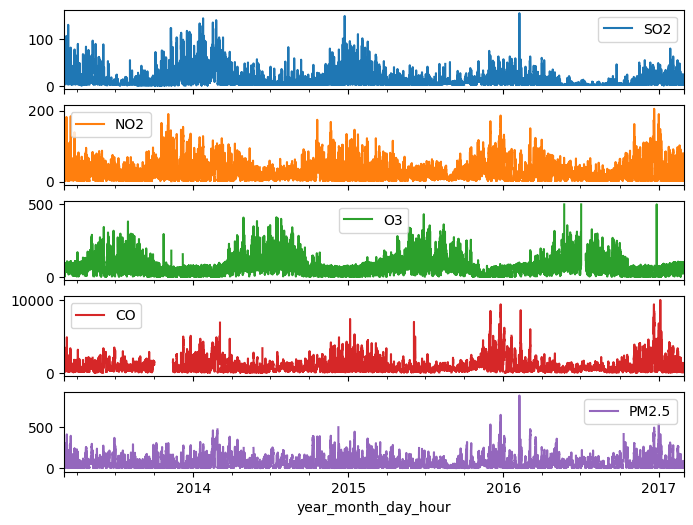

In [ ]:
multi_data2 = aq_df[['SO2','NO2','O3','CO','PM2.5']]
multi_data2.plot(subplots= True)

Text(0.5, 0, 'year_month_day_hour')

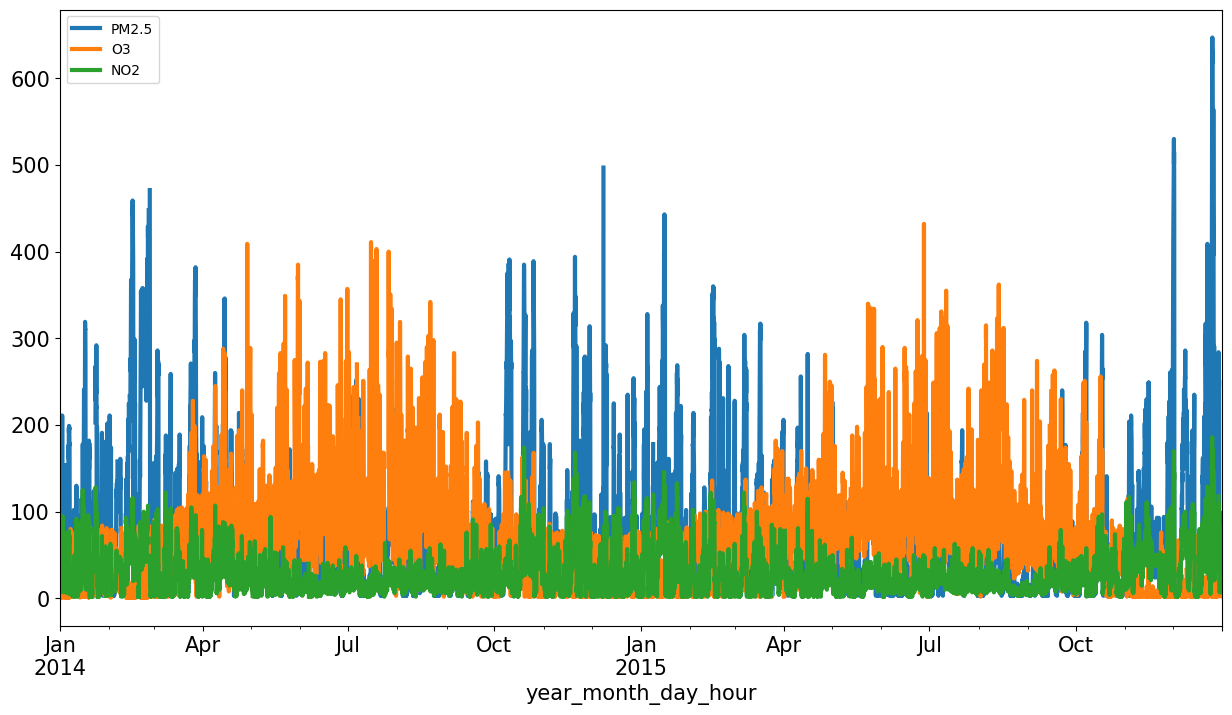

In [ ]:
aq_df['2014':'2015'][['PM2.5','O3','NO2']].plot(figsize=(15,8),linewidth=3,fontsize=15)
plt.xlabel('year_month_day_hour',fontsize = 15)

In [ ]:
aq_df_2015['PM2.5']

year_month_day_hour
2015-01-01 00:00:00     NaN
2015-01-01 01:00:00     NaN
2015-01-01 02:00:00     NaN
2015-01-01 03:00:00     NaN
2015-01-01 04:00:00     NaN
                       ... 
2015-12-31 19:00:00    85.0
2015-12-31 20:00:00     NaN
2015-12-31 21:00:00    80.0
2015-12-31 22:00:00    93.0
2015-12-31 23:00:00    98.0
Name: PM2.5, Length: 8760, dtype: float64

In [ ]:
aq_df_2015

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2015-01-01 00:00:00  16105  2015      1   1    0    NaN    NaN   NaN   NaN   
2015-01-01 01:00:00  16106  2015      1   1    1    NaN    NaN   NaN   NaN   
2015-01-01 02:00:00  16107  2015      1   1    2    NaN    NaN   NaN   NaN   
2015-01-01 03:00:00  16108  2015      1   1    3    NaN    NaN   NaN   NaN   
2015-01-01 04:00:00  16109  2015      1   1    4    NaN    NaN   NaN   NaN   
...                    ...   ...    ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015     12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015     12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015     12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015     12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015     12  31   23   98.0   98.0  25.0  75.0   

                         CO   O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                     
2015-01-01 00:00:00     NaN  NaN  -4.0  1025.0 -23.7   0.0   NW   3.3   
2015-01-01 01:00:00     NaN  NaN  -2.0  1022.0 -22.6   0.0  NNE   1.2   
2015-01-01 02:00:00     NaN  NaN  -5.0  1022.0 -23.5   0.0  NNW   1.7   
2015-01-01 03:00:00     NaN  NaN  -5.0  1023.0 -23.5   0.0    N   1.7   
2015-01-01 04:00:00     NaN  NaN  -5.0  1024.0 -24.0   0.0   NE   1.8   
...                     ...  ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0  2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0  2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0  2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0  2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0  2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
year_month_day_hour            
2015-01-01 00:00:00  Dingling  
2015-01-01 01:00:00  Dingling  
2015-01-01 02:00:00  Dingling  
2015-01-01 03:00:00  Dingling  
2015-01-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[8760 rows x 18 columns]

In [ ]:
aq_df.isnull().values.any()

True

In [ ]:
aq_df.isnull().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [ ]:
aq_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

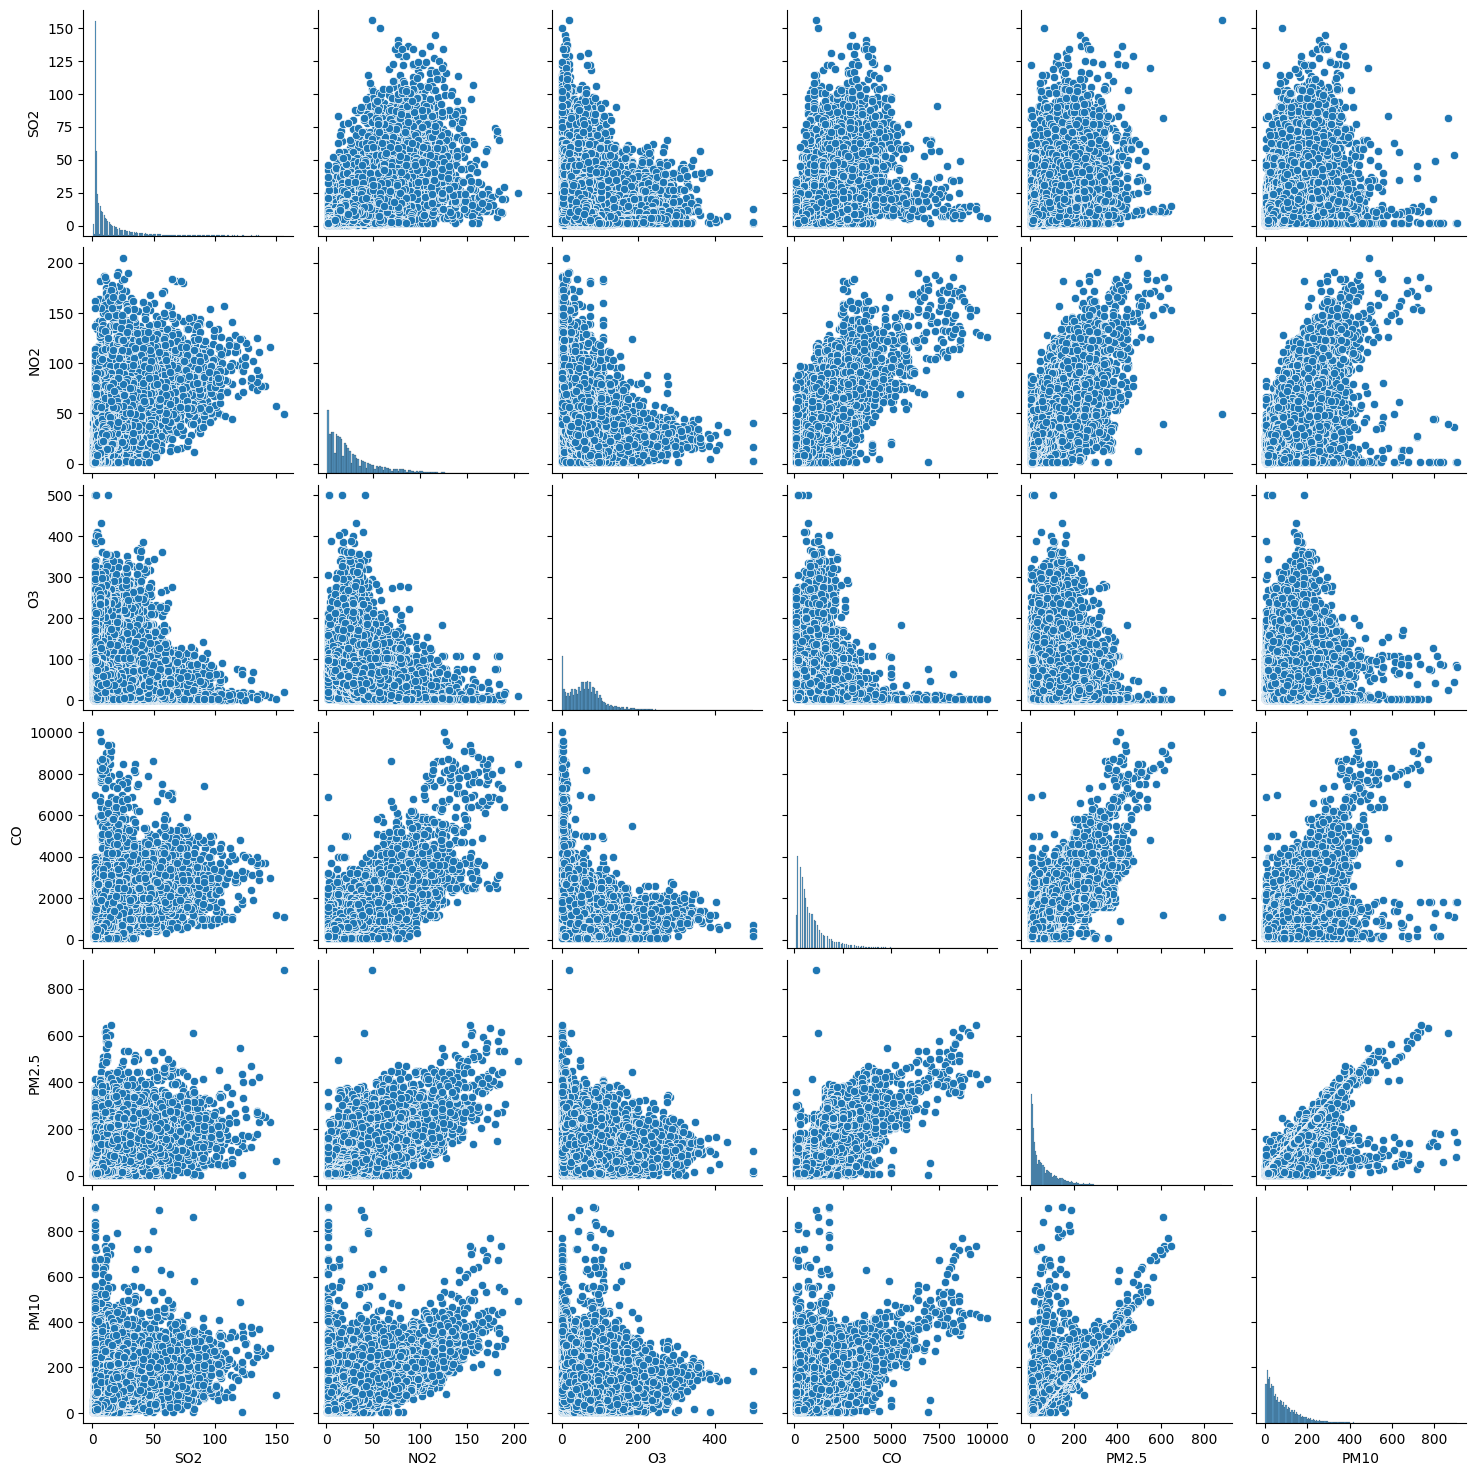

In [ ]:
# Correlation between variables
g = sns.pairplot(aq_df[['SO2','NO2','O3','CO','PM2.5','PM10']])


In [ ]:
aq_corr = aq_df[['SO2','NO2','O3','CO','PM2.5','PM10']].corr(method = 'pearson')
aq_corr 

SO2       NO2        O3        CO     PM2.5      PM10
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117  0.450585
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170  0.653864
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542 -0.018229
CO     0.529182  0.798753 -0.303275  1.000000  0.802737  0.685482
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000  0.868127
PM10   0.450585  0.653864 -0.018229  0.685482  0.868127  1.000000

## **3.1 Generate heatmap to visualize correlation**

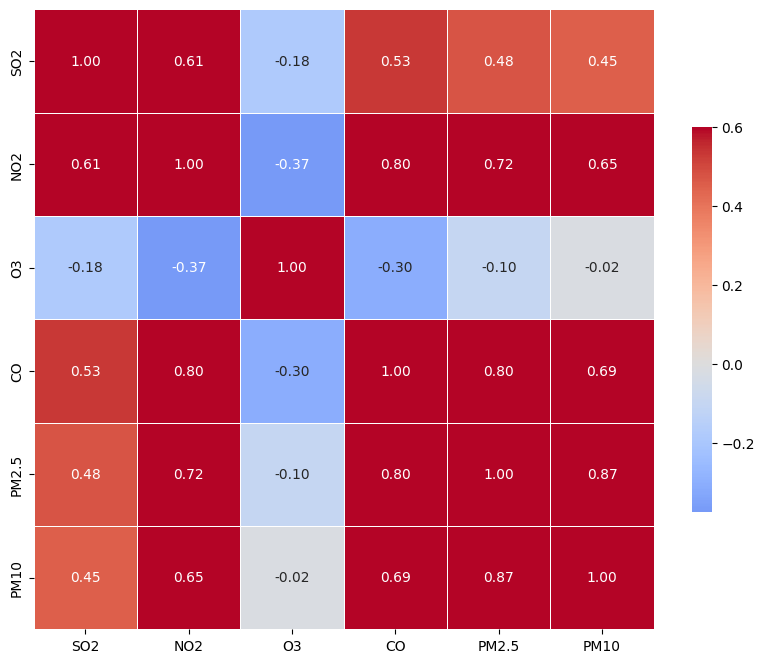

In [ ]:
g = sns.heatmap(aq_corr, vmax=.6, center=0, square = True, linewidth = .5, cbar_kws={'shrink':.5}, annot = True, fmt = '.2f', cmap='coolwarm' )
g.figure.set_size_inches(10,10)

plt.show()

In [ ]:
aq_df.groupby('wd').agg(median=('PM2.5','median'),mean=('PM2.5','mean'),max=('PM2.5','max'),min=('PM2.5','min')).reset_index()

wd  median       mean    max  min
0     E    70.0  88.623363  434.0  3.0
1   ENE    56.5  77.685514  647.0  3.0
2   ESE    78.5  96.492276  632.0  3.0
3     N    29.0  57.546221  536.0  3.0
4    NE    32.0  57.390083  530.0  3.0
5   NNE    26.0  53.946239  881.0  3.0
6   NNW    33.0  62.790775  548.0  3.0
7    NW    21.0  52.769116  535.0  3.0
8     S    52.0  72.497281  511.0  3.0
9    SE    70.0  85.045709  617.0  3.0
10  SSE    61.0  79.925967  614.0  3.0
11  SSW    50.0  73.078253  493.0  3.0
12   SW    46.0  70.233140  459.0  3.0
13    W    22.0  49.488104  446.0  3.0
14  WNW    14.0  37.307447  515.0  3.0
15  WSW    39.0  66.725926  451.0  3.0

In [ ]:
# Drop the null values
aq_df_na = aq_df.copy()
aq_df_na = aq_df_na.dropna()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

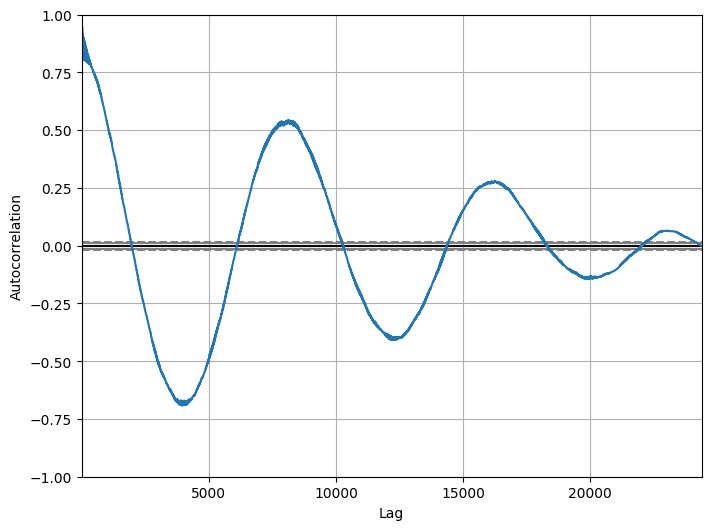

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

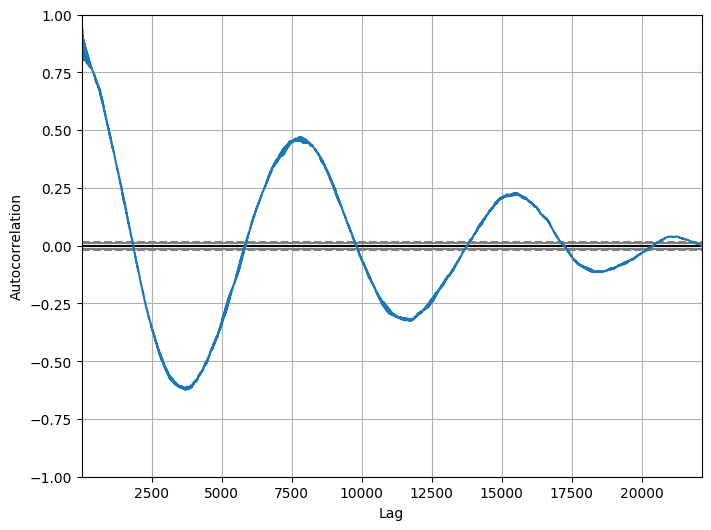

In [ ]:
pd.plotting.autocorrelation_plot(aq_df_na['2013':'2015']['TEMP'])

In [ ]:
aq_df_na['TEMP'].resample('1m').mean()

year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

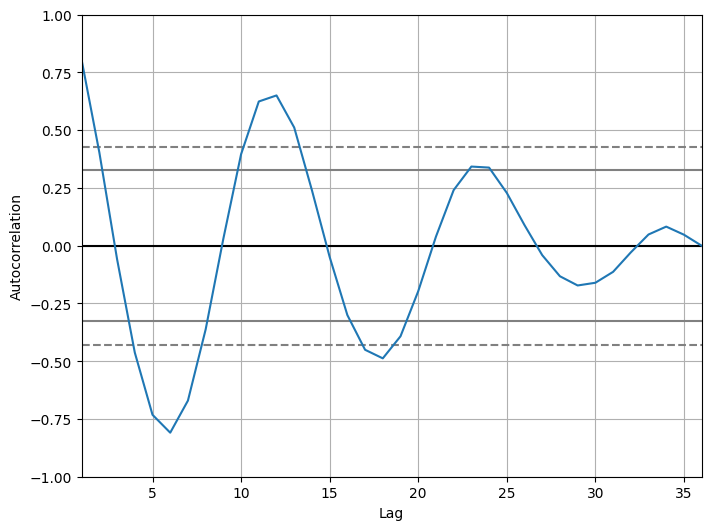

In [ ]:
autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample('1m').mean())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

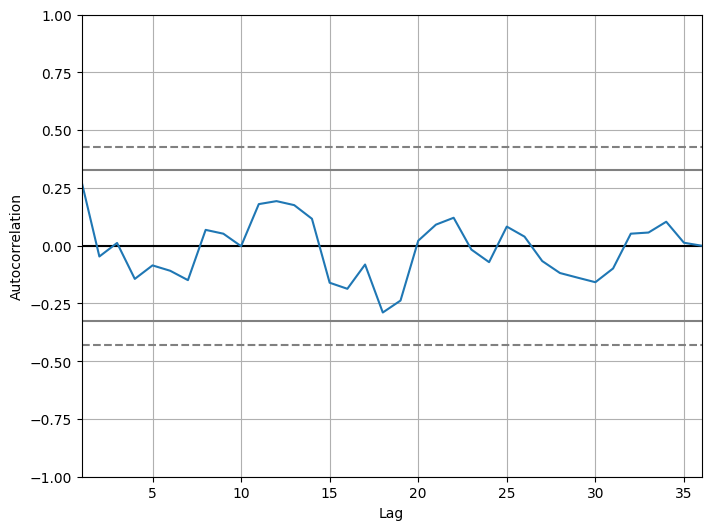

In [ ]:
autocorrelation_plot(aq_df_na['2014':'2016']['PM2.5'].resample('1m').mean())